<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Lesson + Lab)

***

Week 2 | Lesson 4.1-Alt

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Know what situations **grouping** is useful for
- Explain the **`.groupby()`** feature in Pandas
- Demonstrate aggregation /w plotting methods in Pandas

## Specific Examples When GroupBy is Useful
 - Segmenting customers based on age, buying habbits, interests, behavior
 




- Popularity of movie genres based on ticket sales

 - Sum of crimes given time of day in SF (morning, afternoon, night)

 - Count number of people with the same last name

 - Median number of multi-unit buildings in a region

## What is Grouping?

_(visually)_

![](http://www.w3resource.com/sql/sql-root-images/group-by.gif)

![](http://www.omnis.net/support/images/technews/g2msimplebargraph.jpg)

_Think about what this would look like as a summary statistic like mean or sum?_

![](http://stephanieevergreen.com/wp-content/uploads/2013/08/DivergingFinal.png)

_Summary grouped by question and response category_

![](http://zmjones.com/static/posts/titanic-survival-glm.png)

In [18]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'cat1':['X','X','Y','Y','Z'],
                   'cat2':['alpha','beta','alpha','beta','alpha'],
                   'a':np.random.randn(5),
                   'b':np.random.randn(5)})
df

,a,b,cat1,cat2
0,-0.885157,-1.178156,X,alpha
1,1.068671,0.304478,X,beta
2,-0.447678,-0.705240,Y,alpha
3,1.955013,-1.345214,Y,beta
4,0.917043,1.297700,Z,alpha


**This gives us a specific feature "a", grouped by cat1.** 

_Notice that groups don't really print anything interesting on their own._

In [19]:
group = df['a'].groupby(df['cat1'])
group

**Groups can be operated on in aggregate.**

In [20]:
# mean
group.mean()

cat1
X    0.091757
Y    0.753667
Z    0.917043
Name: a, dtype: float64

In [4]:
# median
group.median()

cat1
X   -0.570512
Y   -0.701811
Z   -1.966179
Name: a, dtype: float64

In [5]:
# sum
group.sum()

cat1
X   -1.141025
Y   -1.403623
Z   -1.966179
Name: a, dtype: float64

**We can use group keys that are series as well**

For example:

In [6]:
#We'll make some arrays for use as keys
cities = np.array(['NY','LA','LA','NY','NY'])
month = np.array(['JAN','FEB','JAN','FEB','JAN'])

#Now using the data from dataset1, group the means by city and month
df['a'].groupby([cities,month]).mean()

LA  FEB   -1.557525
    JAN   -1.341313
NY  FEB   -0.062310
    JAN   -0.774839
Name: a, dtype: float64

This is an equivelent method for doing the same thing but you will find this to be much more common when dealing with DataFrames.

In [7]:
# adding cites and month to our DataFrame
df['cities'] = np.array(['NY','LA','LA','NY','NY'])
df['month'] = np.array(['JAN','FEB','JAN','FEB','JAN'])
df

,a,b,cat1,cat2,cities,month
0,0.416501,1.350614,X,alpha,NY,JAN
1,-1.557525,-0.009333,X,beta,LA,FEB
2,-1.341313,0.682276,Y,alpha,LA,JAN
3,-0.062310,-0.489784,Y,beta,NY,FEB
4,-1.966179,0.949568,Z,alpha,NY,JAN


In [8]:
df.groupby(['cities', 'month']).a.mean()

cities  month
LA      FEB     -1.557525
        JAN     -1.341313
NY      FEB     -0.062310
        JAN     -0.774839
Name: a, dtype: float64

## For 1 minute:  Ask your group what would you expect to happen if you didn't specifiy a column / feature label?

In [9]:
# It looks nicer for 1 thing!
df.groupby(['cities', 'month']).mean()

a         b
cities month                    
LA     FEB   -1.557525 -0.009333
       JAN   -1.341313  0.682276
NY     FEB   -0.062310 -0.489784
       JAN   -0.774839  1.150091

Grouping by a single variable can be done by specifying a variable key string.

In [10]:
df.groupby('cities').mean()

,a,b
cities,,
LA,-1.449419,0.336472
NY,-0.537329,0.603466


In [11]:
df.groupby('cities').count()

,a,b,cat1,cat2,month
cities,,,,,
LA,2,2,2,2,2
NY,3,3,3,3,3


## 5 mins discuss with your group:  How might you use this in the future?

**Getting Subsets By Index**

Usually, we tell a DataFrame what we want by axis, to get a series.  with groups, we can still select columns, but the way we select subsets is a little different.  We must request them with a method for example:

In [12]:
# Re-init our test data
df = pd.DataFrame({'cat1':['X','X','Y','Y','Z'],
                   'cat2':['alpha','beta','alpha','beta','alpha'],
                   'a':np.random.randn(5),
                   'b':np.random.randn(5)})

df['cities'] = np.array(['NY','LA','LA','NY','NY'])
df['month'] = np.array(['JAN','FEB','JAN','FEB','JAN'])

df

,a,b,cat1,cat2,cities,month
0,0.034067,-0.836588,X,alpha,NY,JAN
1,0.409341,1.001098,X,beta,LA,FEB
2,-0.872610,0.390119,Y,alpha,LA,JAN
3,-0.185371,-0.571781,Y,beta,NY,FEB
4,-0.126833,-0.584744,Z,alpha,NY,JAN


In [13]:
# our group by values of cat2, inside of groups by cities
df.groupby(["cities", "cat2"]).size()

cities  cat2 
LA      alpha    1
        beta     1
NY      alpha    2
        beta     1
dtype: int64

In [14]:
# Fetching group subset pairs
my_group = df.groupby(["cities"])
for c in my_group.groups: 
    print c

NY
LA


In [15]:
my_group

In [16]:
my_group.get_group(('LA', 'beta'))

KeyError: ('LA', 'beta')

In [ ]:
# Say we want NY only from our subset
my_group.get_group('NY')

In [ ]:
my_group = df.groupby(["cities", "cat2"])
for c in my_group.groups: 
    print c

## 2-5 minutes try to do this with a partner:

 - Make a group object using citites and cat2
 - Select the cities subgroup "NY" with cat2 values "alpha"
 - Use get_group() on your group object, and pass a tuple with 2 values as the parameter
   - The first tuple element is the value you are looking for in "cities" index
   - The 2nd tuple element is the value you are looking for in "cat2"

In [ ]:
my_group.get_group(('NY', 'alpha'))

## Explain what happened 

More useful info about groups and selection in the [Pandas Cookbook docs](http://pandas.pydata.org/pandas-docs/stable/cookbook.html)

A quick note about two popular aggregates that seem the same, but are not!

.count() vs .size()

In [ ]:
# Gives us counts of record rows repeated over variable columns
df.groupby('cities').count()

In [ ]:
# .size gives us counts as series, not repeated values over column variables
df.groupby('cities').size()

With a Pandas **group object**, .count(), .size(), .sum(), .mean(), .std() are some very common ways to apply calcuation operations in aggregate to subsets of your data.

[Pandas .groupby docs](http://pandas.pydata.org/pandas-docs/version/0.15.2/groupby.html)


In [ ]:
# Other group by methods include -- 
# sorry was too pressed for time to manually format this list

groupby_list = """
gb.filter  gb.get_group  gb.height  gb.last gb.median gb.ngroups    gb.plot       gb.rank       gb.std        gb.transform
gb.aggregate  gb.count      gb.cumprod    gb.dtype      gb.first      gb.groups     gb.hist       gb.max        gb.min        gb.nth        gb.prod       gb.resample   gb.sum        gb.var
gb.apply      gb.cummax     gb.cumsum     gb.fillna     gb.gender     gb.head       gb.indices    gb.mean       gb.name       gb.ohlc       gb.quantile   gb.size       gb.tail       gb.weight
"""

cleaned_list = map(lambda item: item.replace("gb", "").strip(), groupby_list.split(".")[1:])
pd.DataFrame(cleaned_list, columns=[".groupby() aggregate functions"])

# (basic) Plotting with Groups


In [ ]:
# This is a reminder of what our dataframe looks like
df

In [ ]:
# We want to see the count of alpha + beta values, given cities
df.groupby("cities")['cat2'].count()

In [ ]:
df.groupby("cities")['cat2'].count().plot(kind="bar")

## Who remembers how to groupby with more than one variable?

In [ ]:
df.groupby(["cities","cat2"]).size().plot(kind="bar")

In [ ]:
# Unstack will pull-apart group values for easy display
df.groupby(["cities","cat2"]).size().unstack().plot(kind="bar")

In [ ]:
# Stacking isn't a bad choice for fewer categories but can look cluttery with lots of categories
df.groupby(["cities","cat2"]).size().unstack().plot(kind="bar", stacked=True)

Bar charts are great for displaying quanitites with groups and understanding qantity / size within subsets.  This is only an "introduction".  There are many ways to plot things.

In [21]:
import matplotlib.pyplot as plt

classes = ["class 1"] * 5 + ["class 2"] * 5
vals = [1,3,5,1,3] + [2,6,7,5,2]
p_df = pd.DataFrame({"class": classes, "vals": vals})

fig, ax = plt.subplots(figsize=(8,6))
for label, df in p_df.groupby('class'):
    df.vals.plot(kind="kde", ax=ax, label=label)
plt.legend()

In [22]:
# This could be labled better but notice we can also plot negative values
df.groupby("cities").plot(kind="barh")

KeyError: 'cities'

In [ ]:
# Here's a plot I made with mysterious code!

## Group Exercise

We are going to investigate the nuances of UFO sightings around the US.  By now you should be able to perform groupby operations in multiple dimensions and investigate the relationships between subsets of datasets with basic aggregation.

_Protip, to turn off slide type headers from every dataframe, go to "View" and select "None" from "Cell Toolbar"_

In [23]:
import pandas as pd, numpy as np, seaborn as sns

%matplotlib inline

In [24]:
# Load the UFO dataset!
# Did you know you can load csv over HTTP?  It's not ideal, but it can be done!
ufo = pd.read_csv('https://raw.githubusercontent.com/sinanuozdemir/SF_DAT_17/master/data/ufo.csv')
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


### 1. How many non-null values exist per each variable?

The first thing that is important to know is how complete our dataset is and how uniform are the values.

In [25]:
# Solution here
# ufo.isnull().sum()
ufo.count()

City               80496
Colors Reported    17034
Shape Reported     72141
State              80543
Time               80543
dtype: int64

### 2. What is the breakdown of dtypes in our dataframe?

In [26]:
# Solution here
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

### 3. Provide a "Data Dictionary" that describes these features:

 - Variable / feature name
 - Brief description of what variable appears to represent
 - Expected dtype(s)
 - Number of unique values observed if categorical and < 20 unqiue 

_Please use "Markdown" tables to provide this info.  It's a good idea to get familliar with using markdown format when communicating your results.  Here's a primer on [markdown tables](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables).  No groaning allowed!_

## Change this cell to a "markdown" type cell
| Variable | Description | Expected dtype(s) | Num of unique Values
| --- | --- | :---: | ---:
| City | City of sighting | Str | 80496
| Colors Reported | Reported color of sighting | Str | 17034
| Shape Reported | Reported shape of sighting | Str | 72141
| State | State of sighting | Str | 80543
| Time | Time of sighting | Date/Time | 80543

### 3. Which colors are most commonly reported?
Provide a breakdown of colors by count.

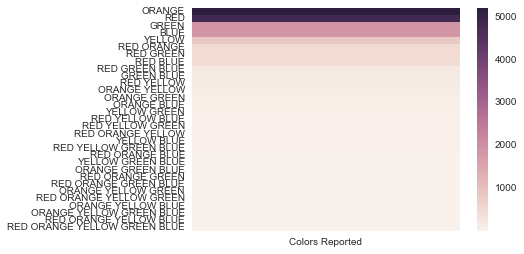

In [27]:
colors = pd.DataFrame(pd.value_counts(ufo['Colors Reported']))
sns.heatmap(colors)

In [ ]:
# n, m = max(enumerate())
# print names[n], m

### 4. Which shapes are most commonly reported?

In [28]:
pd.value_counts(ufo['Shape Reported'])

LIGHT        16332
TRIANGLE      7816
CIRCLE        7725
FIREBALL      6249
OTHER         5506
SPHERE        5231
DISK          5226
OVAL          3721
FORMATION     2405
CIGAR         1983
VARIOUS       1957
FLASH         1329
RECTANGLE     1295
CYLINDER      1252
DIAMOND       1152
CHEVRON        940
EGG            733
TEARDROP       723
CONE           310
CROSS          241
DELTA            7
CRESCENT         2
ROUND            2
HEXAGON          1
FLARE            1
PYRAMID          1
DOME             1
Name: Shape Reported, dtype: int64

### 5. Are there any shapes that take on some colors more than others?
_* Warning: Use of broad langauge._

In [29]:
ufo.groupby(['Shape Reported', 'Colors Reported']).count().sort('City', ascending = False)

/Users/smoot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


City  State  Time
Shape Reported Colors Reported                            
LIGHT          RED                       1188   1188  1188
               ORANGE                    1122   1122  1122
FIREBALL       ORANGE                     884    884   884
CIRCLE         ORANGE                     796    796   796
SPHERE         ORANGE                     569    569   569
TRIANGLE       RED                        559    561   561
CIRCLE         RED                        548    548   548
LIGHT          BLUE                       403    403   403
               GREEN                      378    378   378
FIREBALL       RED                        376    377   377
               GREEN                      353    353   353
SPHERE         RED                        335    335   335
TRIANGLE       ORANGE                     299    299   299
OVAL           ORANGE                     236    236   236
OTHER          RED                        233    233   233
LIGHT          YELLOW                     208    208   208
FORMATION      RED                        207    207   207
               ORANGE                     206    206   206
OTHER          ORANGE                     199    199   199
CIRCLE         BLUE                       194    194   194
OVAL           RED                        191    191   191
DISK           RED                        187    187   187
CIRCLE         GREEN                      182    182   182
SPHERE         BLUE                       148    148   148
               GREEN                      144    144   144
FIREBALL       BLUE                       142    142   142
DISK           ORANGE                     122    122   122
TRIANGLE       BLUE                       120    120   120
OTHER          BLUE                       116    116   116
               GREEN                      116    116   116
...                                       ...    ...   ...
RECTANGLE      GREEN BLUE                   1      1     1
               ORANGE GREEN BLUE            1      1     1
               ORANGE YELLOW GREEN          1      1     1
CIRCLE         ORANGE YELLOW GREEN          1      1     1
RECTANGLE      RED GREEN BLUE               1      1     1
               RED ORANGE GREEN             1      1     1
               RED ORANGE YELLOW            1      1     1
               RED YELLOW BLUE              1      1     1
               RED YELLOW GREEN BLUE        1      1     1
               YELLOW BLUE                  1      1     1
ROUND          ORANGE                       1      1     1
OVAL           RED ORANGE YELLOW BLUE       1      1     1
               RED ORANGE YELLOW            1      1     1
OTHER          ORANGE YELLOW GREEN          1      1     1
CONE           RED ORANGE                   1      1     1
LIGHT          ORANGE YELLOW BLUE           1      1     1
               ORANGE YELLOW GREEN          1      1     1
               ORANGE YELLOW GREEN BLUE     1      1     1
CROSS          ORANGE YELLOW                1      1     1
LIGHT          RED ORANGE YELLOW GREEN      1      1     1
CRESCENT       ORANGE                       1      1     1
VARIOUS        YELLOW GREEN                 1      1     1
OVAL           RED ORANGE GREEN             1      1     1
CONE           RED BLUE                     1      1     1
               ORANGE YELLOW                1      1     1
OTHER          RED ORANGE GREEN BLUE        1      1     1
               RED ORANGE YELLOW GREEN      1      1     1
               RED YELLOW GREEN             1      1     1
OVAL           RED ORANGE BLUE              1      1     1
FIREBALL       RED ORANGE BLUE              0      1     1

[382 rows x 3 columns]

In [30]:
pd.pivot_table(ufo, index = ['Shape Reported'], values = ['Colors Reported'], aggfunc = [len],).sort(ascending=False)

/Users/smoot/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  if __name__ == '__main__':


,len
,Colors Reported
Shape Reported,
VARIOUS,1957
TRIANGLE,7816
TEARDROP,723
SPHERE,5231
ROUND,2
RECTANGLE,1295
PYRAMID,1
OVAL,3721


### 6. Display only the group for "CIGAR" using a bit mask.. 
Go ahead try it out.

In [37]:
%timeit ufo[ufo['Shape Reported'] == 'CIGAR']

100 loops, best of 3: 4.06 ms per loop


### 7. Return only the group for "VARIOUS" without using a bit mask..
It can be done and we're not just making this up!

In [38]:
%timeit ufo.groupby('Shape Reported').get_group('VARIOUS')


100 loops, best of 3: 4.37 ms per loop


### 8. Plot the counts of shapes, states, colors
Double check our notebook and feel free to use Google for help.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ufo.groupby(["State","Shape Reported", "Colors Reported"]).size().plot(kind="bar")
    

### 9. Plot counts of sightings per City

In [ ]:
short_list = ufo[0:11]
ufo_city = pd.value_counts(ufo['City'])
ufo_city = pd.DataFrame(ufo_city)
ufo_city = ufo_city[ ufo_city['[City]' > ufo_city['City'].mean()]]
print short_list

### 10.  Your co-worker in your data science team has approached you with some concerns..

<center>![a real data scientist](http://nerdist.com/wp-content/uploads/2016/02/20160225_becausescience_pokemon_1x1.jpg)
_* Actual data scientists may vary in appearance_
</center>


They tell you that group counting your sightings by city might be inaccurate.  How can you reassure them that your logic is sound and you are certianly correct?  Demonstrate to them, in any other way possible (with code) that you think counting groups by city is a good idea (right?).  Show them by using another method, or grouping in conjunction with other variables validates your assumptions.

### 11.  Which cities have the most "CIGAR" sightings?

In [50]:
# cigar_df = ufo[ufo['Shape Reported'] == 'CIGAR'].count()
ufo.groupby(['City', 'Shape Reported']).size().nlargest(20)

City           Shape Reported
Seattle        LIGHT             129
Phoenix        LIGHT             106
New York City  LIGHT             105
Portland       LIGHT             100
San Diego      LIGHT              94
Las Vegas      LIGHT              85
Los Angeles    LIGHT              72
Myrtle Beach   LIGHT              66
Houston        LIGHT              64
New York City  DISK               63
Tinley Park    LIGHT              60
Tucson         LIGHT              58
Miami          LIGHT              57
New York City  CIRCLE             56
Orlando        LIGHT              55
Seattle        FIREBALL           55
New York City  SPHERE             51
Seattle        OTHER              51
               CIRCLE             50
Albuquerque    LIGHT              49
dtype: int64

---

Ask instructors for help on everything previous to this point, but we have designed the bonus material around collaboration in mind.  The next few problems are to be completed without instructor help.

```
if lab_question > 11:
    no_instructors_allowed()
```

### 12.  Bonus:  Display only top 20 shape counts reported by state!

This is a weird problem yes?  You're going to have weird questions and google is your friend!  So for this problem, we have found the answer with the search term "pandas top 10 by group" is a semi-obvious place where you will find many of these types of answers.

You will easily find the answer but you will need to think about how to implement the solution as the ones you find won't be copy and paste but should demonstrate the intuition for doing so using a grouby object.

This is the expected output, _using a groupby() and [some method(s)] to display "State" and "Shape" as your group indexes with a count!_:

```
State  Shape Reported
CA     LIGHT             2171
       CIRCLE            1023
WA     LIGHT             1016
CA     TRIANGLE           955
FL     LIGHT              916
TX     LIGHT              847
CA     FIREBALL           808
       DISK               775
       OTHER              749
       SPHERE             726
NY     LIGHT              691
AZ     LIGHT              677
IL     LIGHT              600
PA     LIGHT              581
OH     LIGHT              525
FL     FIREBALL           524
MI     LIGHT              468
FL     CIRCLE             467
OR     LIGHT              466
CA     OVAL               465
dtype: int64
```

### 13.  Bonus:  What are the top 20 shapes by City + State?


### 14. Bonus: What hours of the day are sightings most commonly reported?

To solve this problem, you will need to follow these steps:
    - Convert time feature to datetime type
    - Create a new feature based on a characteristic of the first step
    - Check our Slack for how to accomplish this (dyerrington posted this recently) 
    
There are at least 3 students who have asked how to do this out of personal interest in our class.  Your mission is to seek them out for advice.  No instructors allowed!

### 15. BONUS BONUS:  Generally, what interesting insights can you share about our UFO dataset?
    
Be as detailed as possible and tell us a nice story (long or short), about your observations.  Great ideas are:
 - Summary statistics
 - Outliers
 - Patterns
 - Latent characteristics
 - Graphs / plots / ascii art